**CS481 Notebook 9**: Text corpora loading and simple analysis with NTLK

Import nltk package (and matplot for some graphs):

In [32]:
imort re
import nltk
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In NLTK you can download (to your hardrive all available corpora at once with:

In [4]:
# nltk.download()

Or you can download them individually:

In [34]:
# nltk.download('brown')
nltk.download('gutenberg')
# nltk.download('reuters')
# You can add / download other corpora as well

[nltk_data] Downloading package gutenberg to /Users/eyob/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

Let's pick our corpus to work with:

In [35]:
corpus = nltk.corpus.gutenberg
# corpus = nltk.corpus.gutenberg
# corpus = nltk.corpus.reuters

Some corpora will have categories, some won't. Let's try to display available categories if any:

In [36]:
try:
    print('Text corpus categories:')
    print()
    for category in corpus.categories():
        categoriesAvailable = True
        print(category)
except AttributeError :
    print('No categories for this corpus.')
    categoriesAvailable = False

Text corpus categories:

No categories for this corpus.


Let's print out **sentences** (first 10) in the entire corpus:

In [37]:
sentences = corpus.sents()
for index in range(10):
    print(' '.join(sentences[index]))

[ Emma by Jane Austen 1816 ]
VOLUME I
CHAPTER I
Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .
She was the youngest of the two daughters of a most affectionate , indulgent father ; and had , in consequence of her sister ' s marriage , been mistress of his house from a very early period .
Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses ; and her place had been supplied by an excellent woman as governess , who had fallen little short of a mother in affection .
Sixteen years had Miss Taylor been in Mr . Woodhouse ' s family , less as a governess than a friend , very fond of both daughters , but particularly of Emma .
Between _them_ it was more the intimacy of sisters .
Even before Miss Taylor had ceased to hold the nominal office of gover

In [38]:
#subCorpus = ntlk

Before we proceed, let's eliminate stop words. NLTK has a stopwords corpus:

In [39]:
nltk.download('stopwords')
stopWordsCorpus = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/eyob/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


All corpus **words** (tokens, really) can be extracted as follows:

In [40]:
words = corpus.words()

Let's update the list of words by eliminating stopwords:

In [41]:
words = [w for w in words if w.lower() not in stopWordsCorpus]

If we are interested in **frequency of word occurences** we can use NLTK's FreqDistribution function:

In [42]:
frequencyDistribution = nltk.FreqDist(word.lower() for word in words) # note lowercasing with lower()

Let me create a Python dictionary to hold WORDS and their FREQUENCY counts:

In [43]:
frequenciesAndWords = dict()

In [44]:
for word in words:
    frequenciesAndWords[word] = frequencyDistribution[word]

In [45]:
frequenciesAndWords = list(frequenciesAndWords.items())
frequenciesAndWords.sort(key = lambda a: a[1])
frequenciesAndWords.reverse()

# I can also break it back down:
labels, frequencies = map(list, zip(*frequenciesAndWords))

# let's display first thirty words with their frequencies:
for index in range(10):
    print(labels[index] , ' ', frequencies[index])

,   186091
.   73746
:   47406
;   27329
'   19873
"   15422
shall   11682
said   9429
unto   9010
-   8850


Time for some plots:

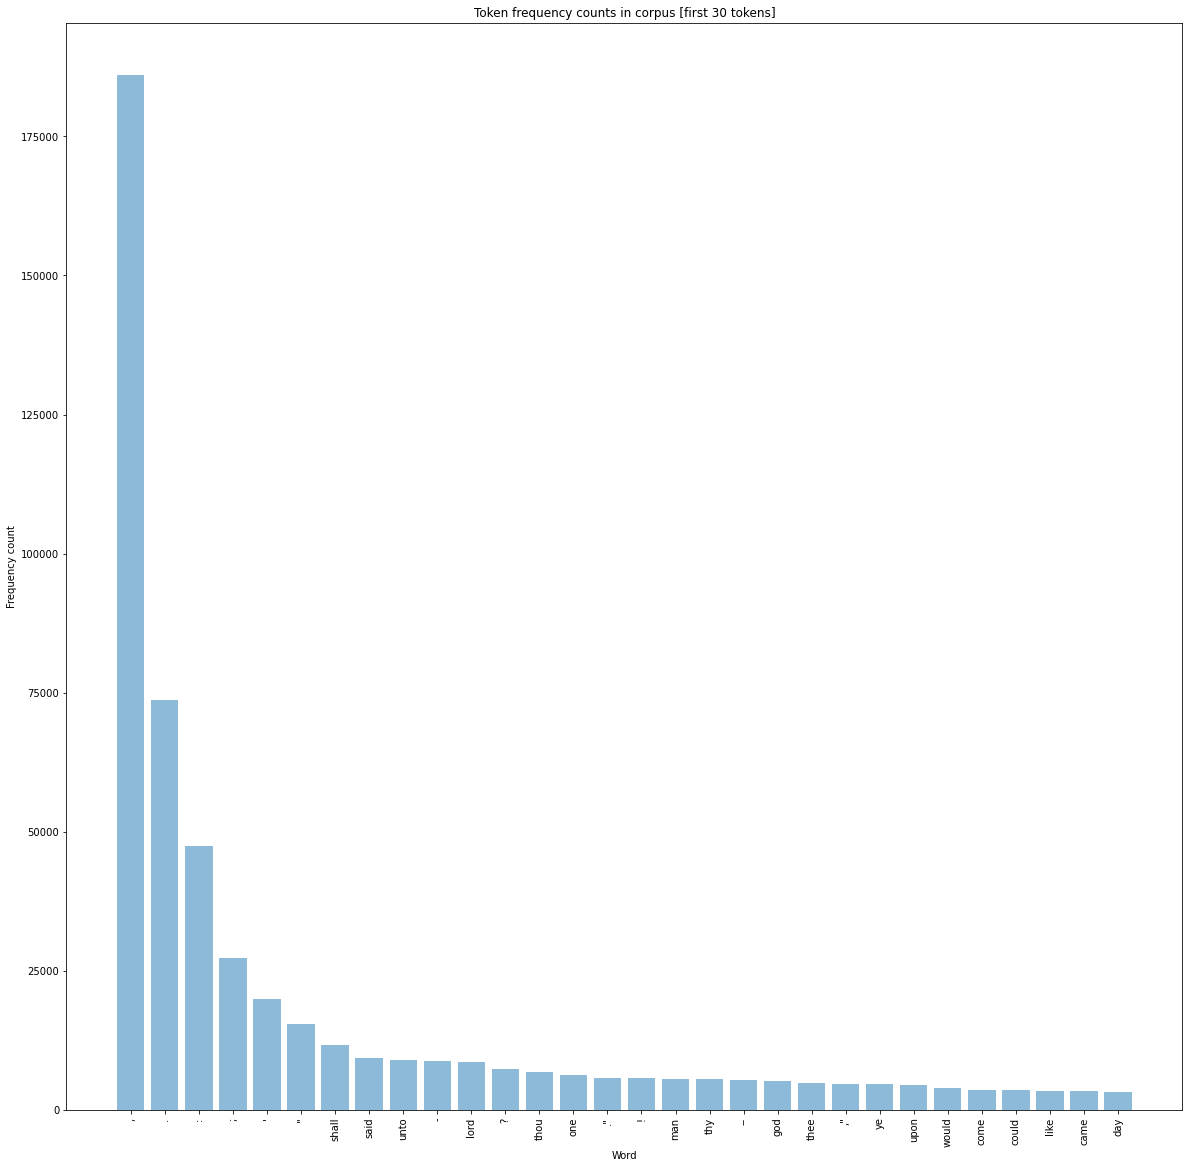

In [46]:
numberOfWords = 30
yPos = range(len(labels))
plt.figure(figsize=(20,20))  #to increase the plot resolution

plt.bar(yPos[:numberOfWords], frequencies[:numberOfWords], align = 'center', alpha=0.5)
plt.xticks(yPos[:numberOfWords], labels[:numberOfWords])
plt.title('Token frequency counts in corpus [first 30 tokens]')
plt.xlabel('Word')
plt.ylabel('Frequency count')
plt.xticks(rotation=90)    #to rotate x-axis values

plt.show()

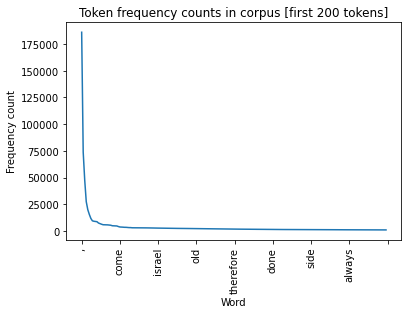

In [47]:
labels2 = labels[:200]
frequencies2 = frequencies[:200]
fig, ax = plt.subplots()
xs = range(len(labels2))


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels2[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(xs, frequencies2)
ax.set_title('Token frequency counts in corpus [first 200 tokens]')
plt.xlabel('Word')
plt.ylabel('Frequency count')
plt.xticks(rotation=90)
plt.show()

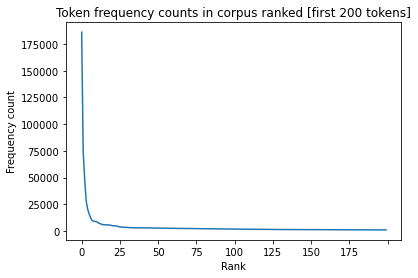

In [48]:
labels2 = labels[:200]
frequencies2 = frequencies[:200]
fig, ax = plt.subplots()
xs = range(len(labels2))
labels2 = range(len(labels2))


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels2[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(xs, frequencies2)
ax.set_title('Token frequency counts in corpus ranked [first 200 tokens]')
plt.xlabel('Rank')
plt.ylabel('Frequency count')
plt.show()

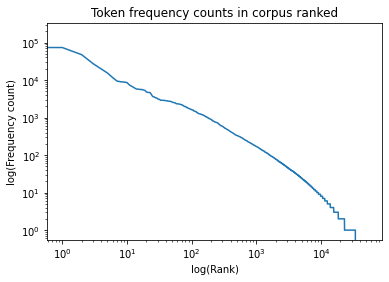

In [49]:
labels2 = labels[:200]
frequencies2 = frequencies[:200]
fig, ax = plt.subplots()
xs = range(len(labels))
labels2 = range(len(labels))


def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels2[int(tick_val)]
    else:
        return ''


# A FuncFormatter is created automatically.
ax.xaxis.set_major_formatter(format_fn)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_yscale('log')
ax.plot(xs, frequencies)
ax.set_title('Token frequency counts in corpus ranked')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency count)')
plt.show()

Concordance example:

In [50]:
corpusAsText = nltk.Text(corpus.words())
corpusAsText.concordance('profound')

Displaying 25 of 37 matches:
to be let . This , however , was a profound secret , not to be breathed beyond
abor . 5 : 2 And the revolters are profound to make slaughter , though I have 
he Beetle raised his head from his profound bow , his gaze happened to alight 
nbull had all his life professed a profound interest in physical science , and
 him , as if it were compounded of profound colour . His black coat looked as 
oveit stood for nearly a minute in profound silence . " Tarlton ," said he at 
se , nearly every man maintained a profound silence . And not only that , but 
he told me -- he was actuated by a profound desire to learn among the Christia
he Pequod , we found everything in profound quiet , not a soul moving . The ca
g priority of his claims , and the profound ignorance which , till some sevent
 was not so much immersed in those profound magnetic meditations , as to fail 
ze profundities , and all truth is profound . Winding far down from within the
 take away any incredul

In [55]:
word=corpus.words()
data= " ".join(word)
data = data.lower()
technical = "navigation"
nontechnical = "hello"
t=data.count(technical)
d1=t/len(data)
n=data.count(nontechnical)
d2=n/len(data)
print(d1,d2)

6.606719496197998e-07 5.780879559173249e-07
